In [1]:
#import Func_Lib as func
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
plt.style.use('seaborn-white')
import time
import os
from glob import glob
import sys
import seaborn as sns
from decimal import Decimal

In [2]:
RCP=pd.read_csv('/cluster/tufts/lamontagnelab/gshabe01/sqcook_temp-trends_cmip5.csv')
RCP['RCP4.5 F']=RCP['rcp4.5']*9/5
RCP['RCP8.5 F']=RCP['rcp8.5']*9/5


In [3]:
RCP['RCP4.5_rolling']=RCP['RCP4.5 F'].rolling(10).mean().fillna(method='bfill')
RCP['RCP8.5_rolling']=RCP['RCP8.5 F'].rolling(10).mean().fillna(method='bfill')
RCP.head()

,year,Year,rcp4.5,rcp8.5,RCP4.5 F,RCP8.5 F,RCP4.5_rolling,RCP8.5_rolling
0,1/1/2006,2006,0.657916,0.801510,1.184249,1.442719,0.922674,1.291274
1,1/1/2007,2007,1.645037,0.772989,2.961066,1.391381,0.922674,1.291274
2,1/1/2008,2008,0.050608,0.773060,0.091094,1.391508,0.922674,1.291274
3,1/1/2009,2009,0.165518,1.204147,0.297932,2.167464,0.922674,1.291274
4,1/1/2010,2010,-0.089410,0.498086,-0.160937,0.896554,0.922674,1.291274


In [4]:
RCP.index=pd.to_datetime(RCP['year'])
RCP.head(5)

,year,Year,rcp4.5,rcp8.5,RCP4.5 F,RCP8.5 F,RCP4.5_rolling,RCP8.5_rolling
year,,,,,,,,
2006-01-01,1/1/2006,2006,0.657916,0.801510,1.184249,1.442719,0.922674,1.291274
2007-01-01,1/1/2007,2007,1.645037,0.772989,2.961066,1.391381,0.922674,1.291274
2008-01-01,1/1/2008,2008,0.050608,0.773060,0.091094,1.391508,0.922674,1.291274
2009-01-01,1/1/2009,2009,0.165518,1.204147,0.297932,2.167464,0.922674,1.291274
2010-01-01,1/1/2010,2010,-0.089410,0.498086,-0.160937,0.896554,0.922674,1.291274


In [5]:
RCP.loc['2075-01-01']

year              1/1/2075
Year                  2075
rcp4.5            0.847027
rcp8.5             3.50958
RCP4.5 F           1.52465
RCP8.5 F           6.31724
RCP4.5_rolling     2.85783
RCP8.5_rolling     5.70886
Name: 2075-01-01 00:00:00, dtype: object

In [5]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg0/annualmaxbig*.npy')
annualmax_0=np.array(np.array([np.load(f) for f in filename])[:,:,0:10000].tolist())
#print(annualmax_0.shape)


In [6]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg0.5/annualmaxbig*.npy')
annualmax_05=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_05.shape)

In [7]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg1/annualmaxbig*.npy')
annualmax_1=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_1.shape)

In [8]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg1.5/annualmaxbig*.npy')
annualmax_15=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_15.shape)

In [9]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg2/annualmaxbig*.npy')
annualmax_2=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_2.shape)

In [10]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg2.5/annualmaxbig*.npy')
annualmax_25=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_25.shape)

In [8]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg3/annualmaxbig*.npy')
annualmax_3=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_3.shape)

In [12]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg3.5/annualmaxbig*.npy')
annualmax_35=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_35.shape)

In [13]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg4/annualmaxbig*.npy')
annualmax_4=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_4.shape)

In [14]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg4.5/annualmaxbig*.npy')
annualmax_45=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_45.shape)

In [15]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg5/annualmaxbig*.npy')
annualmax_5=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_5.shape)

In [16]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg5.5/annualmaxbig*.npy')
annualmax_55=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_55.shape)

In [17]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg6/annualmaxbig*.npy')
annualmax_6=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_6.shape)

In [18]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg6.5/annualmaxbig*.npy')
annualmax_65=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_65.shape)

In [19]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg7/annualmaxbig*.npy')
annualmax_7=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_7.shape)

In [20]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg7.5/annualmaxbig*.npy')
annualmax_75=np.array([np.load(f) for f in filename])[:,:,0:10000]
#print(annualmax_75.shape)

In [21]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg8/annualmaxbig*.npy')
annualmax_8=np.array([np.load(f) for f in filename])[:,:,0:10000]
print(annualmax_8.shape)

(100, 64, 10000)


In [6]:
RCP['RCP4.5_step']=round(RCP['RCP4.5_rolling']*2)/2
RCP['RCP8.5_step']=round(RCP['RCP8.5_rolling']*2)/2

RCP['0']=np.zeros(len(RCP))
#RCP.head()

In [10]:
print(RCP.loc['2075-01-01'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg3/medianflood100_*.npy')
Q100_75_RCP45=np.array([np.load(f) for f in filename])
np.median(Q100_75_RCP45)

year              1/1/2075
Year                  2075
rcp4.5            0.847027
rcp8.5             3.50958
RCP4.5 F           1.52465
RCP8.5 F           6.31724
RCP4.5_rolling     2.85783
RCP8.5_rolling     5.70886
RCP4.5_step              3
RCP8.5_step            5.5
0                        0
Name: 2075-01-01 00:00:00, dtype: object


4212.025206150198

In [23]:
Annualmax=[annualmax_0.reshape(-1),annualmax_05.reshape(-1),annualmax_1.reshape(-1),\
           annualmax_15.reshape(-1),annualmax_2.reshape(-1),annualmax_25.reshape(-1),annualmax_3.reshape(-1),\
           annualmax_35.reshape(-1),annualmax_4.reshape(-1),annualmax_45.reshape(-1),\
           annualmax_5.reshape(-1),annualmax_55.reshape(-1),annualmax_6.reshape(-1),\
           annualmax_65.reshape(-1),annualmax_7.reshape(-1),annualmax_75.reshape(-1),annualmax_8.reshape(-1)]


In [7]:
Annualmax=np.load('/cluster/tufts/lamontagnelab/gshabe01/annualmax_all.npy')

In [24]:
np.save('/cluster/tufts/lamontagnelab/gshabe01/annualmax_all.npy',np.array(Annualmax))

In [8]:
def Risk(n,Q,annualmax,WarmingT):
    ''''
    n: design life
    Q: streamflow the function is calculating the risk for
    annualmax: a list with vectors of annual maximum for each warming level 
    WarmingT: a vector for warming of each year based on RCP (closest warming to RCP between stochastic scenarios)
    --------------------------------------------------------------------------------------------------------------
    Reliability_Q: reliability of flow Q until year n considering WarmingT occours 
    Risk_Q: Risk of flow Q until year n considering WarmingT occours 
    
    '''
    T=WarmingT[0]
    PQ=np.zeros(n)
    for i in range(0,n):
        T=WarmingT[i]
        a=np.int(T*2)
        A=Annualmax[a]<Q
        PQ[i]=np.count_nonzero(A)/(len(Annualmax[a]))
    
    Reliability_Q=np.prod(PQ)
    Risk_Q=1-Reliability_Q
    return Risk_Q, Reliability_Q,T

In [17]:
Q_arrays=np.zeros((17,100))
w=np.arange(0,8.5,.5)
for t in range(0,17):
    

    n=Decimal(w[t]).normalize()
    filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/medianflood500_*.npy' %n)
    Q=np.array([np.load(f) for f in filename])
    Q_arrays[t,:]=Q
    
Q500_warmings = np.median(Q_arrays,axis=1)
Q500_CV=np.std(Q_arrays, ddof=1,axis=1) / np.mean(Q_arrays,axis=1) * 100

In [18]:
Q_arrays=np.zeros((17,100))
w=np.arange(0,8.5,.5)
for t in range(0,17):
    

    n=Decimal(w[t]).normalize()
    filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/medianflood100_*.npy' %n)
    Q=np.array([np.load(f) for f in filename])
    Q_arrays[t,:]=Q
    
Q100_warmings = np.median(Q_arrays,axis=1)
Q100_CV=np.std(Q_arrays, ddof=1,axis=1) / np.mean(Q_arrays,axis=1) * 100

In [20]:
Q_arrays=np.zeros((17,100))
w=np.arange(0,8.5,.5)
for t in range(0,17):
    

    n=Decimal(w[t]).normalize()
    filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/medianflood50_*.npy' %n)
    Q=np.array([np.load(f) for f in filename])
    Q_arrays[t,:]=Q
    
Q50_warmings = np.median(Q_arrays,axis=1)
Q50_CV=np.std(Q_arrays, ddof=1,axis=1) / np.mean(Q_arrays,axis=1) * 100

In [21]:
Q_arrays=np.zeros((17,100))
w=np.arange(0,8.5,.5)
for t in range(0,17):
    

    n=Decimal(w[t]).normalize()
    filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/medianflood10_*.npy' %n)
    Q=np.array([np.load(f) for f in filename])
    Q_arrays[t,:]=Q
    
Q10_warmings = np.median(Q_arrays,axis=1)
Q10_CV=np.std(Q_arrays, ddof=1,axis=1) / np.mean(Q_arrays,axis=1) * 100

In [22]:
Q_arrays=np.zeros((17,100))
w=np.arange(0,8.5,.5)
for t in range(0,17):
    

    n=Decimal(w[t]).normalize()
    filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/medianflood2_*.npy' %n)
    Q=np.array([np.load(f) for f in filename])
    Q_arrays[t,:]=Q
    
Q2_warmings = np.median(Q_arrays,axis=1)
Q2_CV=np.std(Q_arrays, ddof=1,axis=1) / np.mean(Q_arrays,axis=1) * 100

In [23]:
warmigns_returnperiod = pd.DataFrame(np.array([Q2_warmings,Q10_warmings,Q50_warmings,Q100_warmings,Q500_warmings]).T, columns=['2-year','10-year','50-year','100-year','500-year'])
CV_returnperiod = pd.DataFrame(np.array([Q2_CV,Q10_CV,Q50_CV,Q100_CV,Q500_CV]).T, columns=['2-year','10-year','50-year','100-year','500-year'])
warmigns_returnperiod['warming']=np.arange(0,8.5,.5)
warmigns_returnperiod

,2-year,10-year,50-year,100-year,500-year,warming
0,1130.935131,2080.383488,3233.845961,3808.474259,5351.993832,0.0
1,1130.056147,2081.223023,3225.712441,3794.403803,5326.192625,0.5
2,1135.980206,2107.873421,3281.006058,3860.589813,5433.919552,1.0
3,1147.711938,2128.502080,3332.042207,3925.258512,5532.230606,1.5
4,1159.624907,2183.086995,3415.950683,4037.739462,5676.855743,2.0
5,1172.056138,2210.768891,3483.655977,4118.253518,5807.373656,2.5
6,1190.898002,2257.257531,3571.191750,4212.025206,5959.211158,3.0
7,1221.444321,2316.102604,3690.674418,4372.820012,6191.860578,3.5
8,1240.026279,2380.147223,3798.604124,4489.258504,6362.764070,4.0
9,1267.545985,2453.834553,3935.988888,4665.298212,6643.277250,4.5


In [24]:
warmigns_returnperiod.columns.values.tolist()[1]

'10-year'

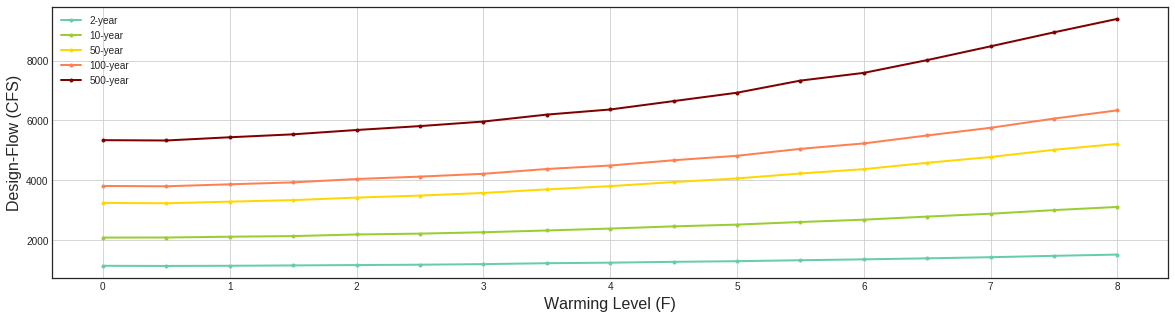

In [25]:
warmigns_returnperiod=warmigns_returnperiod.set_index('warming',drop=True)
col=warmigns_returnperiod.columns.values.tolist()
l=['mediumaquamarine','yellowgreen','gold','coral','maroon']

fig, ax= plt.subplots(figsize=(20,5))
ax.set_prop_cycle('color', ['mediumaquamarine','yellowgreen','gold','coral','maroon'])
lines=ax.plot(warmigns_returnperiod.index.values,warmigns_returnperiod,'.-',lw=2)

plt.xlabel('Warming Level (F)', size=16)
plt.ylabel('Design-Flow (CFS)',size=16)
plt.legend(col)
plt.grid()

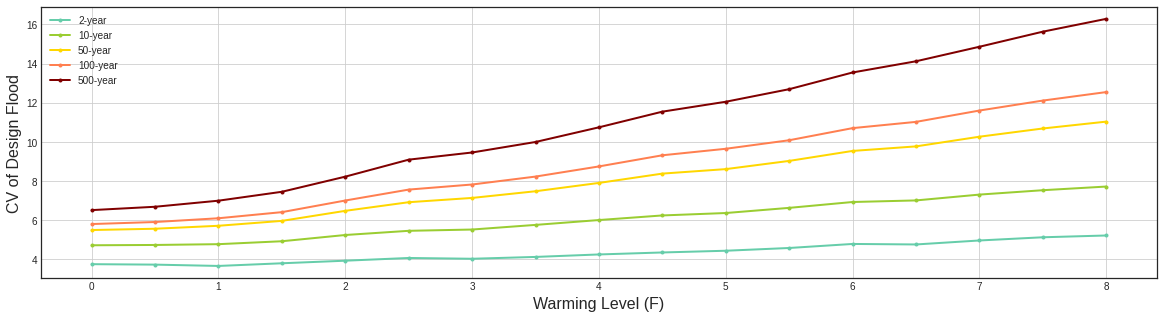

In [38]:
#warmigns_returnperiod=warmigns_returnperiod.set_index('warming',drop=True)
col=warmigns_returnperiod.columns.values.tolist()
l=['mediumaquamarine','yellowgreen','gold','coral','maroon']

fig, ax= plt.subplots(figsize=(20,5))
ax.set_prop_cycle('color', ['mediumaquamarine','yellowgreen','gold','coral','maroon'])
lines=ax.plot(warmigns_returnperiod.index.values,CV_returnperiod,'.-',lw=2)

plt.xlabel('Warming Level (F)', size=16)
plt.ylabel('CV of Design Flood',size=16)
plt.legend(col)
plt.grid()

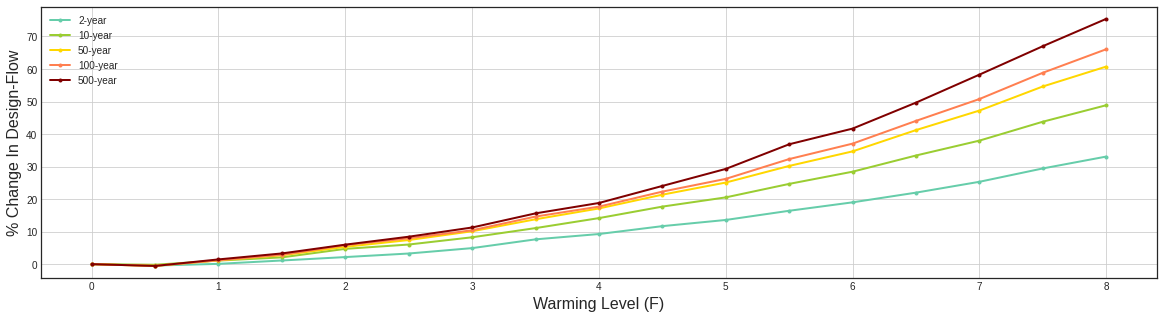

In [39]:
fig, ax=plt.subplots(figsize=(20,5))
for i in range(0,len(col)):
    #ax.scatter(warmigns_returnperiod.index.values,(warmigns_returnperiod[col[i]]-warmigns_returnperiod[col[i]].loc[0])/warmigns_returnperiod[col[i]].loc[0]*100,color=l[i])
    ax.plot(warmigns_returnperiod.index.values,(warmigns_returnperiod[col[i]]-warmigns_returnperiod[col[i]].loc[0])/warmigns_returnperiod[col[i]].loc[0]*100,'.-',lw=2,label=col[i],color=l[i])
    
plt.xlabel('Warming Level (F)', size=16)
plt.ylabel('% Change In Design-Flow',size=16)
plt.legend(col)
plt.grid()

In [40]:
Risk_100_RCP45, Reliability_100_RCP45,T_50_RCP45 = Risk(50,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['RCP4.5_step'])

In [41]:
Risk_100_RCP85, Reliability_100_RCP85,T_50_RCP85 = Risk(50,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk_100_RCP45, Reliability_100_RCP45,T_50_RCP45 = Risk(50,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['RCP4.5_step'])

In [42]:
Risk_500_RCP85, Reliability_500_RCP85,T_50_RCP85 = Risk(50,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk_500_RCP45, Reliability_500_RCP45,T_50_RCP45 = Risk(50,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['RCP4.5_step'])

In [43]:
Risk_50_RCP85, Reliability_50_RCP85,T_50_RCP85 = Risk(50,warmigns_returnperiod['50-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk_50_RCP45, Reliability_50_RCP45,T_50_RCP45 = Risk(50,warmigns_returnperiod['50-year'].loc[0],Annualmax,RCP['RCP4.5_step'])

In [44]:
Risk_10_RCP85, Reliability_10_RCP85,T_50_RCP85 = Risk(50,warmigns_returnperiod['10-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk_10_RCP45, Reliability_10_RCP45,T_50_RCP45 = Risk(50,warmigns_returnperiod['10-year'].loc[0],Annualmax,RCP['RCP4.5_step'])

In [45]:
Risk_2_RCP85, Reliability_2_RCP85,T_50_RCP85 = Risk(50,warmigns_returnperiod['2-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk_2_RCP45, Reliability_2_RCP45,T_50_RCP45 = Risk(50,warmigns_returnperiod['2-year'].loc[0],Annualmax,RCP['RCP4.5_step'])

In [46]:
RiskFrame=pd.DataFrame(np.array([[Risk_500_RCP85,Risk_100_RCP85,Risk_50_RCP85,Risk_10_RCP85,Risk_2_RCP85],[Risk_500_RCP45,Risk_100_RCP45,Risk_50_RCP45,Risk_10_RCP45,Risk_2_RCP45]]).T,columns=['RCP8.5','RCP4.5'],index=['500Y','100Y','50Y','10Y','2Y'])
RiskFrame

,RCP8.5,RCP4.5
500Y,0.149250,0.144076
100Y,0.453534,0.439564
50Y,0.697310,0.681834
10Y,0.999580,0.999476
2Y,1.000000,1.000000


In [11]:
#RCP

In [47]:
Risk(60,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['RCP4.5_step'])

(0.17637721497453995, 0.82362278502546, 3.0)

In [49]:
Risk(60,9000,Annualmax,RCP['RCP4.5_step'])

(0.3475573799168711, 0.6524426200831289, 3.0)

In [59]:
Risk(90,12000,Annualmax,RCP['RCP8.5_step'])

(0.33572369649214195, 0.664276303507858, 7.0)

In [216]:
Risk(90,11000,Annualmax,RCP['RCP4.5_step'])

(0.10940568166520714, 0.8905943183347929, 3.0)

In [48]:
Risk80_2_RCP85, Reliability80_2_RCP85,T_80_RCP85 = Risk(80,warmigns_returnperiod['2-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk80_2_RCP45, Reliability80_2_RCP45,T_80_RCP45 = Risk(80,warmigns_returnperiod['2-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk80_10_RCP85, Reliability80_10_RCP85,T_80_RCP85 = Risk(80,warmigns_returnperiod['10-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk80_10_RCP45, Reliability80_10_RCP45,T_80_RCP45 = Risk(80,warmigns_returnperiod['10-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk80_50_RCP85, Reliability80_50_RCP85,T_80_RCP85 = Risk(80,warmigns_returnperiod['50-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk80_50_RCP45, Reliability80_50_RCP45,T_80_RCP45 = Risk(80,warmigns_returnperiod['50-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk80_500_RCP85, Reliability80_500_RCP85,T_80_RCP85 = Risk(80,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk80_500_RCP45, Reliability80_500_RCP45,T_80_RCP45 = Risk(80,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk80_100_RCP85, Reliability80_100_RCP85,T_80_RCP85 = Risk(80,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk80_100_RCP45, Reliability80_100_RCP45,T_80_RCP45 = Risk(80,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['RCP4.5_step'])

In [49]:
RiskFrame80=pd.DataFrame(np.array([[Risk80_500_RCP85,Risk80_100_RCP85,Risk80_50_RCP85,Risk80_10_RCP85,Risk80_2_RCP85],[Risk80_500_RCP45,Risk80_100_RCP45,Risk80_50_RCP45,Risk80_10_RCP45,Risk80_2_RCP45]]).T,columns=['RCP8.5','RCP4.5'],index=['500Y','100Y','50Y','10Y','2Y'])

In [50]:
RiskFrame80

,RCP8.5,RCP4.5
500Y,0.313597,0.237447
100Y,0.757547,0.638085
50Y,0.937156,0.866119
10Y,1.000000,0.999997
2Y,1.000000,1.000000


In [51]:
Risk10_2_RCP85, Reliability10_2_RCP85,T_10_RCP85 = Risk(10,warmigns_returnperiod['2-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk10_2_RCP45, Reliability10_2_RCP45,T_10_RCP45 = Risk(10,warmigns_returnperiod['2-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk10_10_RCP85, Reliability10_10_RCP85,T_10_RCP85 = Risk(10,warmigns_returnperiod['10-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk10_10_RCP45, Reliability10_10_RCP45,T_10_RCP45 = Risk(10,warmigns_returnperiod['10-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk10_50_RCP85, Reliability10_50_RCP85,T_10_RCP85 = Risk(10,warmigns_returnperiod['50-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk10_50_RCP45, Reliability10_50_RCP45,T_10_RCP45 = Risk(10,warmigns_returnperiod['50-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk10_500_RCP85, Reliability10_500_RCP85,T_10_RCP85 = Risk(10,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk10_500_RCP45, Reliability10_500_RCP45,T_10_RCP45 = Risk(10,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk10_100_RCP85, Reliability10_100_RCP85,T_10_RCP85 = Risk(10,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk10_100_RCP45, Reliability10_100_RCP45,T_10_RCP45 = Risk(10,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['RCP4.5_step'])

In [52]:
RiskFrame10=pd.DataFrame(np.array([[Risk10_500_RCP85,Risk10_100_RCP85,Risk10_50_RCP85,Risk10_10_RCP85,Risk10_2_RCP85],[Risk10_500_RCP45,Risk10_100_RCP45,Risk10_50_RCP45,Risk10_10_RCP45,Risk10_2_RCP45]]).T,columns=['RCP8.5','RCP4.5'],index=['500Y','100Y','50Y','10Y','2Y'])

In [53]:
Risk20_2_RCP85, Reliability20_2_RCP85,T_20_RCP85 = Risk(20,warmigns_returnperiod['2-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk20_2_RCP45, Reliability20_2_RCP45,T_20_RCP45 = Risk(20,warmigns_returnperiod['2-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk20_10_RCP85, Reliability20_10_RCP85,T_20_RCP85 = Risk(20,warmigns_returnperiod['10-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk20_10_RCP45, Reliability20_10_RCP45,T_20_RCP45 = Risk(20,warmigns_returnperiod['10-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk20_50_RCP85, Reliability20_50_RCP85,T_20_RCP85 = Risk(20,warmigns_returnperiod['50-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk20_50_RCP45, Reliability20_50_RCP45,T_20_RCP45 = Risk(20,warmigns_returnperiod['50-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk20_500_RCP85, Reliability20_500_RCP85,T_20_RCP85 = Risk(20,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk20_500_RCP45, Reliability20_500_RCP45,T_20_RCP45 = Risk(20,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk20_100_RCP85, Reliability20_100_RCP85,T_20_RCP85 = Risk(20,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk20_100_RCP45, Reliability20_100_RCP45,T_20_RCP45 = Risk(20,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['RCP4.5_step'])

In [54]:
RiskFrame20=pd.DataFrame(np.array([[Risk20_500_RCP85,Risk20_100_RCP85,Risk20_50_RCP85,Risk20_10_RCP85,Risk20_2_RCP85],[Risk20_500_RCP45,Risk20_100_RCP45,Risk20_50_RCP45,Risk20_10_RCP45,Risk20_2_RCP45]]).T,columns=['RCP8.5','RCP4.5'],index=['500Y','100Y','50Y','10Y','2Y'])

In [55]:
Risk30_2_RCP85, Reliability30_2_RCP85,T_30_RCP85 = Risk(30,warmigns_returnperiod['2-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk30_2_RCP45, Reliability30_2_RCP45,T_30_RCP45 = Risk(30,warmigns_returnperiod['2-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk30_10_RCP85, Reliability30_10_RCP85,T_30_RCP85 = Risk(30,warmigns_returnperiod['10-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk30_10_RCP45, Reliability30_10_RCP45,T_30_RCP45 = Risk(30,warmigns_returnperiod['10-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk30_50_RCP85, Reliability30_50_RCP85,T_30_RCP85 = Risk(30,warmigns_returnperiod['50-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk30_50_RCP45, Reliability30_50_RCP45,T_30_RCP45 = Risk(30,warmigns_returnperiod['50-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk30_500_RCP85, Reliability30_500_RCP85,T_30_RCP85 = Risk(30,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk30_500_RCP45, Reliability30_500_RCP45,T_30_RCP45 = Risk(30,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['RCP4.5_step'])
Risk30_100_RCP85, Reliability30_100_RCP85,T_30_RCP85 = Risk(30,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['RCP8.5_step'])
Risk30_100_RCP45, Reliability30_100_RCP45,T_30_RCP45 = Risk(30,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['RCP4.5_step'])

In [56]:
RiskFrame30=pd.DataFrame(np.array([[Risk30_500_RCP85,Risk30_100_RCP85,Risk30_50_RCP85,Risk30_10_RCP85,Risk30_2_RCP85],[Risk30_500_RCP45,Risk30_100_RCP45,Risk30_50_RCP45,Risk30_10_RCP45,Risk30_2_RCP45]]).T,columns=['RCP8.5','RCP4.5'],index=['500Y','100Y','50Y','10Y','2Y'])

In [57]:
Risk(50,4000,Annualmax,RCP['RCP4.5_step'].loc['2025-01-01':])

(0.42026178328185304, 0.579738216718147, 3.0)

In [25]:
#RCP

In [26]:
Risk_2_RCP85=np.zeros(10)
Risk_2_RCP45=np.zeros(10)
Risk_10_RCP85=np.zeros(10)
Risk_10_RCP45=np.zeros(10)
Risk_50_RCP85=np.zeros(10)
Risk_50_RCP45=np.zeros(10)
Risk_100_RCP85=np.zeros(10)
Risk_100_RCP45=np.zeros(10)
Risk_500_RCP85=np.zeros(10)
Risk_500_RCP45=np.zeros(10)
Risk_2_0=np.zeros(10)
Risk_10_0=np.zeros(10)
Risk_50_0=np.zeros(10)
Risk_100_0=np.zeros(10)
Risk_500_0=np.zeros(10)


for i in range(0,8):
    Risk_2_RCP85[i] = Risk(i*10,warmigns_returnperiod['2-year'].loc[0],Annualmax,RCP['RCP8.5_step'].loc['2025-01-01':])[0]
    Risk_2_RCP45[i] = Risk(i*10,warmigns_returnperiod['2-year'].loc[0],Annualmax,RCP['RCP4.5_step'].loc['2025-01-01':])[0]
    Risk_10_RCP85[i] = Risk(i*10,warmigns_returnperiod['10-year'].loc[0],Annualmax,RCP['RCP8.5_step'].loc['2025-01-01':])[0]
    Risk_10_RCP45[i] = Risk(i*10,warmigns_returnperiod['10-year'].loc[0],Annualmax,RCP['RCP4.5_step'].loc['2025-01-01':])[0]
    Risk_50_RCP85[i] = Risk(i*10,warmigns_returnperiod['50-year'].loc[0],Annualmax,RCP['RCP8.5_step'].loc['2025-01-01':])[0]
    Risk_50_RCP45[i] = Risk(i*10,warmigns_returnperiod['50-year'].loc[0],Annualmax,RCP['RCP4.5_step'].loc['2025-01-01':])[0]
    Risk_500_RCP85[i] = Risk(i*10,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['RCP8.5_step'].loc['2025-01-01':])[0]
    Risk_500_RCP45[i] = Risk(i*10,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['RCP4.5_step'].loc['2025-01-01':])[0]
    Risk_100_RCP85[i] = Risk(i*10,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['RCP8.5_step'].loc['2025-01-01':])[0]
    Risk_100_RCP45[i] = Risk(i*10,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['RCP4.5_step'].loc['2025-01-01':])[0]
    
    Risk_2_0[i]=Risk(i*10,warmigns_returnperiod['2-year'].loc[0],Annualmax,RCP['0'].loc['2025-01-01':])[0]
    Risk_10_0[i]=Risk(i*10,warmigns_returnperiod['10-year'].loc[0],Annualmax,RCP['0'].loc['2025-01-01':])[0]
    Risk_50_0[i]=Risk(i*10,warmigns_returnperiod['50-year'].loc[0],Annualmax,RCP['0'].loc['2025-01-01':])[0]
    Risk_100_0[i]=Risk(i*10,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['0'].loc['2025-01-01':])[0]
    Risk_500_0[i]=Risk(i*10,warmigns_returnperiod['500-year'].loc[0],Annualmax,RCP['0'].loc['2025-01-01':])[0]
    

KeyboardInterrupt: 

In [28]:
Risk_100_0[i]=Risk(i*10,warmigns_returnperiod['100-year'].loc[0],Annualmax,RCP['0'].loc['2025-01-01':])[0]

In [34]:
warmigns_returnperiod['100-year'].loc[0]

3808.474259195067

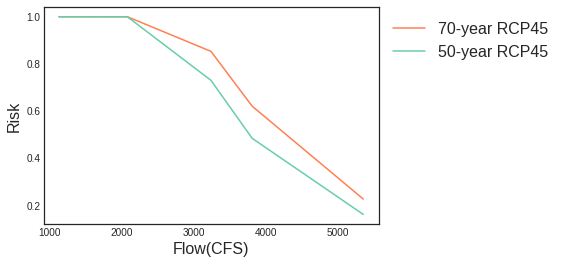

In [61]:
risk_70_RCP85=[Risk_2_RCP85[7],Risk_10_RCP85[7],Risk_50_RCP85[7],Risk_100_RCP85[7],Risk_500_RCP85[7]]
risk_70_RCP45=[Risk_2_RCP45[7],Risk_10_RCP45[7],Risk_50_RCP45[7],Risk_100_RCP45[7],Risk_500_RCP45[7]]
risk_50_RCP85=[Risk_2_RCP85[5],Risk_10_RCP85[5],Risk_50_RCP85[5],Risk_100_RCP85[5],Risk_500_RCP85[5]]
risk_50_RCP45=[Risk_2_RCP45[5],Risk_10_RCP45[5],Risk_50_RCP45[5],Risk_100_RCP45[5],Risk_500_RCP45[5]]
risk_50_0=[Risk_2_0[5],Risk_10_0[5],Risk_50_0[5],Risk_100_0[5],Risk_500_0[5]]
risk_70_0=[Risk_2_0[7],Risk_10_0[7],Risk_50_0[7],Risk_100_0[7],Risk_500_0[7]]

plt.figure()
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_70_RCP85,label='70-year RCP85',color='maroon')
plt.plot(warmigns_returnperiod.loc[0],risk_70_RCP45,label='70-year RCP45',color='coral')
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_50_RCP85,label='50-year RCP85',color='gold')
plt.plot(warmigns_returnperiod.loc[0],risk_50_RCP45,label='50-year RCP45',color='mediumaquamarine')

#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_50_0,label='50-year no-warming',color='silver')
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_70_0,label='70-year no-warming',color='dimgray')

plt.xlabel('Flow(CFS)',fontsize=16)
plt.ylabel('Risk',fontsize=16)
plt.legend(bbox_to_anchor=(1, 1),fontsize=16)

In [64]:
#[2025+0,2025+10,2025+20,2025+30,2025+40,2025+50,2025+60,2025+70,2025+80,2025+90]

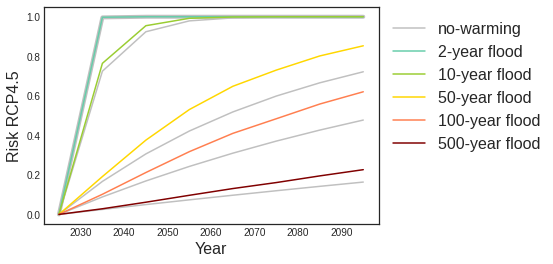

In [62]:
decade=[2025+0,2025+10,2025+20,2025+30,2025+40,2025+50,2025+60,2025+70]
plt.figure()

plt.plot(decade,Risk_500_0[0:8], color='silver',label='no-warming')
plt.plot(decade,Risk_100_0[0:8], color='silver')
plt.plot(decade,Risk_50_0[0:8], color='silver')
#plt.plot(decade,Risk_10_0[0:8], color='silver')
#plt.plot(decade,Risk_2_0[0:8], color='silver',linewidth=4)


#plt.plot(decade,Risk_2_RCP45[0:8], color='mediumaquamarine',label='2-year flood')
#plt.plot(decade,Risk_10_RCP45[0:8], color='yellowgreen',label='10-year flood')
plt.plot(decade,Risk_50_RCP45[0:8], color='gold',label='50-year flood')
plt.plot(decade,Risk_100_RCP45[0:8], color='coral',label='100-year flood')
plt.plot(decade,Risk_500_RCP45[0:8], color='maroon', label='500-year flood')


plt.xlabel('Year',fontsize=16)
plt.ylabel('Risk RCP4.5',fontsize=16)
plt.legend(bbox_to_anchor=(1, 1),fontsize=16)

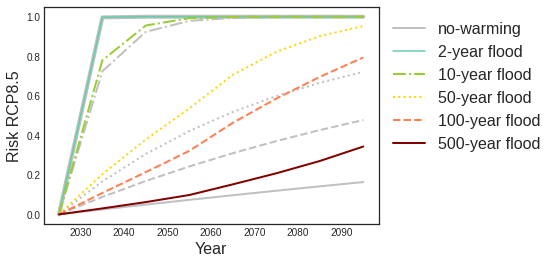

In [63]:
plt.figure()


plt.plot(decade,Risk_500_0[0:8], color='silver',label='no-warming',linewidth=2)
plt.plot(decade,Risk_100_0[0:8], color='silver',linestyle='dashed',linewidth=2)
plt.plot(decade,Risk_50_0[0:8], color='silver',linestyle='dotted',linewidth=2)
plt.plot(decade,Risk_10_0[0:8], color='silver',linestyle='dashdot',linewidth=2)
plt.plot(decade,Risk_2_0[0:8], color='silver',linewidth=4)


plt.plot(decade,Risk_2_RCP85[0:8], color='mediumaquamarine',label='2-year flood')
plt.plot(decade,Risk_10_RCP85[0:8], color='yellowgreen',label='10-year flood',linestyle='dashdot',linewidth=2)
plt.plot(decade,Risk_50_RCP85[0:8], color='gold',label='50-year flood',linestyle='dotted',linewidth=2)
plt.plot(decade,Risk_100_RCP85[0:8], color='coral',label='100-year flood',linestyle='dashed',linewidth=2)
plt.plot(decade,Risk_500_RCP85[0:8], color='maroon', label='500-year flood',linewidth=2)

plt.xlabel('Year',fontsize=16)
plt.ylabel('Risk RCP8.5',fontsize=16)
plt.legend(bbox_to_anchor=(1, 1),fontsize=16)

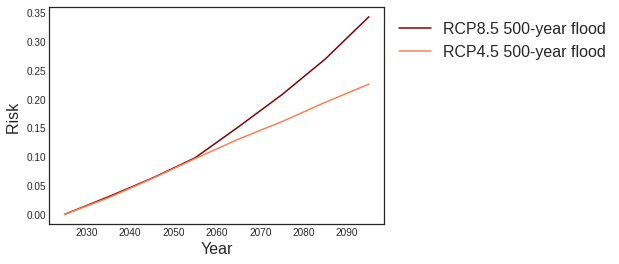

In [64]:
plt.figure()
plt.plot(decade,Risk_500_RCP85[0:8], color='maroon', label='RCP8.5 500-year flood')
plt.plot(decade,Risk_500_RCP45[0:8], color='coral', label='RCP4.5 500-year flood')

plt.xlabel('Year',fontsize=16)
plt.ylabel('Risk ',fontsize=16)
plt.legend(bbox_to_anchor=(1, 1),fontsize=16)

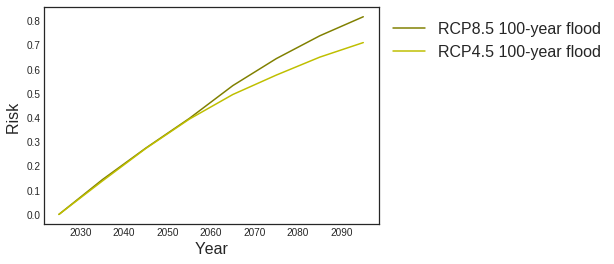

In [68]:
plt.figure()
plt.plot(decade,Risk_100_RCP85[0:8], color='olive', label='RCP8.5 100-year flood')
plt.plot(decade,Risk_100_RCP45[0:8], color='y', label='RCP4.5 100-year flood')

plt.xlabel('Year',fontsize=16)
plt.ylabel('Risk ',fontsize=16)
plt.legend(bbox_to_anchor=(1, 1),fontsize=16)

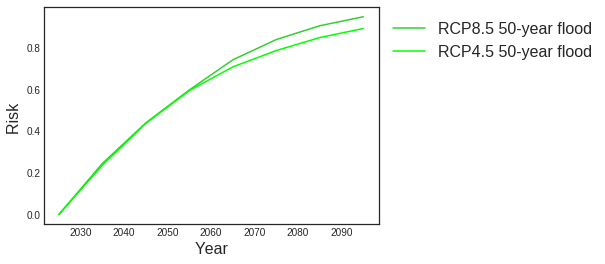

In [69]:
plt.figure()
plt.plot(decade,Risk_50_RCP85[0:8], color='limegreen', label='RCP8.5 50-year flood')
plt.plot(decade,Risk_50_RCP45[0:8], color='lime', label='RCP4.5 50-year flood')

plt.xlabel('Year',fontsize=16)
plt.ylabel('Risk ',fontsize=16)
plt.legend(bbox_to_anchor=(1, 1),fontsize=16)

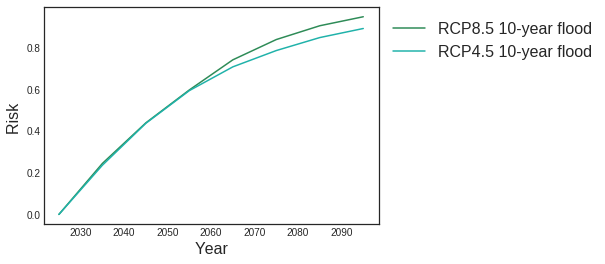

In [70]:
plt.figure()
plt.plot(decade,Risk_50_RCP85[0:8], color='seagreen', label='RCP8.5 10-year flood')
plt.plot(decade,Risk_50_RCP45[0:8], color='lightseagreen', label='RCP4.5 10-year flood')

plt.xlabel('Year',fontsize=16)
plt.ylabel('Risk ',fontsize=16)
plt.legend(bbox_to_anchor=(1, 1),fontsize=16)

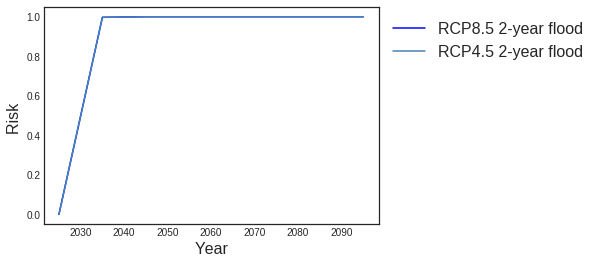

In [71]:
plt.figure()
plt.plot(decade,Risk_2_RCP85[0:8], color='b', label='RCP8.5 2-year flood')
plt.plot(decade,Risk_2_RCP45[0:8], color='steelblue', label='RCP4.5 2-year flood')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Risk ',fontsize=16)
plt.legend(bbox_to_anchor=(1, 1),fontsize=16)

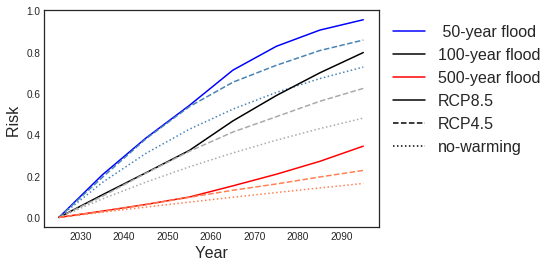

In [23]:
plt.figure()

decade=[2025+0,2025+10,2025+20,2025+30,2025+40,2025+50,2025+60,2025+70]
# plt.plot(decade,Risk_500_0[0:8], color='silver',label='no-warming')
# plt.plot(decade,Risk_100_0[0:8], color='silver')
# plt.plot(decade,Risk_50_0[0:8], color='silver')
# plt.plot(decade,Risk_10_0[0:8], color='silver',linewidth=4)
# plt.plot(decade,Risk_2_0[0:8], color='silver',linewidth=4)


#plt.plot(decade,Risk_2_RCP85[0:8], color='b', label='2-year flood')
#plt.plot(decade,Risk_2_RCP45[0:8], color='steelblue',linestyle='dotted')
plt.plot(decade,Risk_500_0[0:8], color='coral',linestyle='dotted')
plt.plot(decade,Risk_100_0[0:8], color='darkgray',linestyle='dotted')
plt.plot(decade,Risk_50_0[0:8], color='steelblue',linestyle='dotted')

#plt.plot(decade,Risk_10_RCP85[0:8], color='seagreen', label='10-year flood')
#plt.plot(decade,Risk_10_RCP45[0:8], color='lightseagreen',linestyle='dotted')
decade=[2025+0,2025+10,2025+20,2025+30,2025+40,2025+50,2025+60,2025+70]
plt.plot(decade,Risk_50_RCP85[0:8], color='b', label=' 50-year flood')

plt.plot(decade,Risk_50_RCP45[0:8], color='steelblue',linestyle='dashed')

plt.plot(decade,Risk_100_RCP85[0:8], color='k', label='100-year flood')
plt.plot(decade,Risk_100_RCP45[0:8], color='darkgray',linestyle='dashed')


plt.plot(decade,Risk_500_RCP85[0:8], color='r', label='500-year flood')
plt.plot(decade,Risk_500_RCP45[0:8], color='coral',linestyle='dashed')


plt.plot([],[],'k',label='RCP8.5')
plt.plot([],[],'k',ls='dashed',label='RCP4.5')
plt.plot([],[],'k',ls='dotted',label='no-warming')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Risk ',fontsize=16)
plt.legend(bbox_to_anchor=(1, 1),fontsize=16)
plt.savefig('/cluster/tufts/lamontagnelab/gshabe01/RiskYear.png', bbox_inches='tight',dpi=500)

In [39]:
pd.DataFrame(np.array([decade,Risk_50_RCP85[0:8],Risk_100_RCP85[0:8],Risk_500_RCP85[0:8]]).T,columns=['decade','50-year','100-year','500-year']).to_csv('/cluster/tufts/lamontagnelab/gshabe01/fig6-RCP8.5.csv')
pd.DataFrame(np.array([decade,Risk_50_RCP45[0:8],Risk_100_RCP45[0:8],Risk_500_RCP45[0:8]]).T,columns=['decade','50-year','100-year','500-year']).to_csv('/cluster/tufts/lamontagnelab/gshabe01/fig6-RCP4.5.csv')
pd.DataFrame(np.array([decade,Risk_50_0[0:8],Risk_100_0[0:8],Risk_500_0[0:8]]).T,columns=['decade','50-year','100-year','500-year']).to_csv('/cluster/tufts/lamontagnelab/gshabe01/fig6-0deg.csv')

In [40]:
pd.DataFrame(np.array([decade,Risk_50_0[0:8],Risk_100_0[0:8],Risk_500_0[0:8]]).T,columns=['decade','50-year','100-year','500-year'])

,decade,50-year,100-year,500-year
0,2025.0,0.000000,0.000000,0.000000
1,2035.0,0.168847,0.089091,0.025266
2,2045.0,0.309185,0.170245,0.049894
3,2055.0,0.425827,0.244169,0.073900
4,2065.0,0.522775,0.311507,0.097299
5,2075.0,0.603353,0.372845,0.120107
6,2085.0,0.670326,0.428719,0.142339
7,2095.0,0.725990,0.479615,0.164009


In [58]:
print(Risk_500_RCP85[5],Risk_100_RCP85[5],Risk_50_RCP85[5],Risk_10_RCP85[5],Risk_2_RCP85[5])

0.3259683243592809 0.5976395172180088 0.7579133741891665 0.9962277816474175 1.0


In [59]:
print(Risk_500_RCP45[5],Risk_100_RCP45[5],Risk_50_RCP45[5],Risk_10_RCP45[5],Risk_2_RCP45[5])

0.2937769669573477 0.5542184418922794 0.7175109433154581 0.9938195715903648 1.0


In [61]:
print(Risk_500_RCP85[7],Risk_100_RCP85[7],Risk_50_RCP85[7],Risk_10_RCP85[7],Risk_2_RCP85[7])

0.46435079761949216 0.7609990939409477 0.8912236275057618 0.9998010920919075 1.0


In [62]:
print(Risk_500_RCP45[7],Risk_100_RCP45[7],Risk_50_RCP45[7],Risk_10_RCP45[7],Risk_2_RCP45[7])

0.39107754488474167 0.6838422363251724 0.8349082368275861 0.9992744612711281 1.0


In [15]:
def Risk(n,Q,annualmax,T):
    ''''
    n: design life
    Q: streamflow the function is calculating the risk for
    annualmax: a list with vectors of annual maximum for each warming level 
    T: a vector for warming of each year based on RCP (closest warming to RCP between stochastic scenarios)
    --------------------------------------------------------------------------------------------------------------
    Reliability_Q: reliability of flow Q until year n considering WarmingT occours 
    Risk_Q: Risk of flow Q until year n considering WarmingT occours 
    
    '''
    
    PQ=np.zeros(n)
    for i in range(0,n):
        
        a=np.int(T*2)
        #print(a)
        A=Annualmax[a]<Q
        PQ[i]=np.count_nonzero(A)/(len(Annualmax[a]))
    
    Reliability_Q=np.prod(PQ)
    Risk_Q=1-Reliability_Q
    return Risk_Q, Reliability_Q,T

In [38]:
warmigns_returnperiod

,2-year,10-year,50-year,100-year,500-year,warming
0,1130.935131,2080.383488,3233.845961,3808.474259,5351.993832,0.0
1,1130.056147,2081.223023,3225.712441,3794.403803,5326.192625,0.5
2,1135.980206,2107.873421,3281.006058,3860.589813,5433.919552,1.0
3,1147.711938,2128.502080,3332.042207,3925.258512,5532.230606,1.5
4,1159.624907,2183.086995,3415.950683,4037.739462,5676.855743,2.0
5,1172.056138,2210.768891,3483.655977,4118.253518,5807.373656,2.5
6,1190.898002,2257.257531,3571.191750,4212.025206,5959.211158,3.0
7,1221.444321,2316.102604,3690.674418,4372.820012,6191.860578,3.5
8,1240.026279,2380.147223,3798.604124,4489.258504,6362.764070,4.0
9,1267.545985,2453.834553,3935.988888,4665.298212,6643.277250,4.5


In [58]:
Risk(50,warmigns_returnperiod['100-year'].iloc[0],Annualmax,warm[2])[0]
Risk(50,warmigns_returnperiod['100-year'].iloc[0],Annualmax,warm[3])[0]

0.4037527715207688

In [16]:
risk_100=np.zeros(17)
risk_10=np.zeros(17)
risk_50=np.zeros(17)
risk_500=np.zeros(17)
warm=np.arange(0,8.5,.5)
for i in range(0,17):
    risk_100[i] = Risk(50,warmigns_returnperiod['100-year'].iloc[0],Annualmax,warm[i])[0]
    risk_10[i] = Risk(50,warmigns_returnperiod['10-year'].iloc[0],Annualmax,warm[i])[0]
    risk_50[i] = Risk(50,warmigns_returnperiod['50-year'].iloc[0],Annualmax,warm[i])[0]
    risk_500[i] = Risk(50,warmigns_returnperiod['500-year'].iloc[0],Annualmax,warm[i])[0]

In [24]:
pd.DataFrame(np.array([risk_50,risk_100,risk_500]).T, columns=['risk_50year','risk_100year','risk_500year']).to_csv('/cluster/tufts/lamontagnelab/gshabe01/PercentRiskchange.csv')

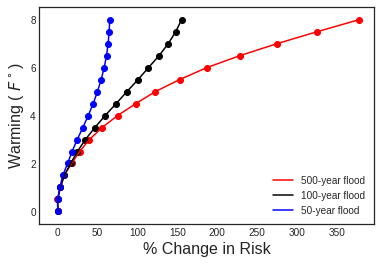

In [18]:
plt.figure()

plt.scatter((risk_500-risk_500[0])/risk_500[0]*100,warm,color='r')
plt.scatter((risk_100-risk_100[0])/risk_100[0]*100,warm,color='k')
plt.scatter((risk_50-risk_50[0])/risk_50[0]*100,warm,color='b')
#plt.scatter((risk_10-risk_10[0])/risk_10[0]*100,warm,color='g')
plt.plot((risk_500-risk_500[0])/risk_500[0]*100,warm,color='r', label='500-year flood')
plt.plot((risk_100-risk_100[0])/risk_100[0]*100,warm,color='k', label='100-year flood')
plt.plot((risk_50-risk_50[0])/risk_50[0]*100,warm,color='b', label='50-year flood')
#plt.plot((risk_10-risk_10[0])/risk_10[0]*100,warm,color='g', label='10-year flood')
plt.legend()
plt.xlabel('% Change in Risk', size=16)
plt.ylabel('Warming ( $F^\circ$)', size=16)
plt.savefig('/cluster/tufts/lamontagnelab/gshabe01/PercentRiskchange.png',bbox_inches='tight',dpi=500)

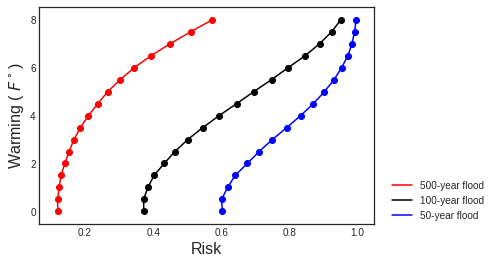

In [19]:
plt.figure()

plt.scatter(risk_500,warm,color='r')
plt.scatter(risk_100,warm,color='k')
plt.scatter(risk_50,warm,color='b')
#plt.scatter(risk_10,warm,color='g')
plt.plot(risk_500,warm,color='r', label='500-year flood')
plt.plot(risk_100,warm,color='k', label='100-year flood')
plt.plot(risk_50,warm,color='b', label='50-year flood')
#plt.plot(risk_10,warm,color='g', label='10-year flood')
plt.legend(loc=(1.04,0))
plt.xlabel('Risk', size=16)
plt.ylabel('Warming ( $F^\circ$)', size=16)
plt.savefig('/cluster/tufts/lamontagnelab/gshabe01/Riskchange.png',bbox_inches='tight',dpi=500)

# Generating Risk for each stream flow 

In [2]:
def Risk(n,Q,annualmax,WarmingT):
    ''''
    n: design life
    Q: streamflow the function is calculating the risk for
    annualmax: a list with vectors of annual maximum for each warming level 
    WarmingT: a vector for warming of each year based on RCP (closest warming to RCP between stochastic scenarios)
    --------------------------------------------------------------------------------------------------------------
    Reliability_Q: reliability of flow Q until year n considering WarmingT occours 
    Risk_Q: Risk of flow Q until year n considering WarmingT occours 
    
    '''
    T=WarmingT[0]
    PQ=np.zeros(n)
    for i in range(0,n):
        T=WarmingT[i]
        a=np.int(T*2)
        A=Annualmax[a]<Q
        PQ[i]=np.count_nonzero(A)/(len(Annualmax[a]))
    
    Reliability_Q=np.prod(PQ)
    Risk_Q=1-Reliability_Q
    return Risk_Q, Reliability_Q,T

In [8]:
Annualmax=np.load('/cluster/tufts/lamontagnelab/gshabe01/annualmax_all.npy')

In [77]:
Risk(50,(1)*50000+Annualmax.min(),Annualmax,RCP['RCP8.5_step'].loc['2025-01-01':])[0]

AttributeError: 'list' object has no attribute 'min'

In [ ]:
n=1000
Min=np.array(Annualmax).min()
Max=np.array(Annualmax).max()
R=np.zeros(n)
R70=np.zeros(n)
Q=np.zeros(n)
step=np.exp(np.linspace(np.log(Min),np.log(Max),n))
for i in range(0,n):
    Q[i]=step[i]
    R[i]=Risk(50, step[i] ,Annualmax,RCP['RCP8.5_step'].loc['2025-01-01':])[0]
    R70[i]=Risk(70,step[i],Annualmax,RCP['RCP8.5_step'].loc['2025-01-01':])[0]
Risk_Q=pd.DataFrame(np.array([Q,R,R70]).T,columns=['Q', 'Risk50Y','Risk70Y'])
Risk_Q['Risk50Y']=Risk_Q['Risk50Y']*100
Risk_Q['Risk70Y']=Risk_Q['Risk70Y']*100
Risk_Q.to_csv('/cluster/tufts/lamontagnelab/gshabe01/Risk_Q_QM_RCP85.csv')


R=np.zeros(n)
R70=np.zeros(n)
Q=np.zeros(n)
for i in range(0,n):
    Q[i]=step[i]
    R[i]=Risk(50,step[i],Annualmax,RCP['RCP4.5_step'].loc['2025-01-01':])[0]
    R70[i]=Risk(70,step[i],Annualmax,RCP['RCP4.5_step'].loc['2025-01-01':])[0]
Risk_Q45=pd.DataFrame(np.array([Q,R,R70]).T,columns=['Q', 'Risk50Y','Risk70Y'])
Risk_Q45['Risk50Y']=Risk_Q45['Risk50Y']*100
Risk_Q45['Risk70Y']=Risk_Q45['Risk70Y']*100
Risk_Q45.to_csv('/cluster/tufts/lamontagnelab/gshabe01/Risk_Q_QM_RCP45.csv')

In [10]:
n=1000
Min=np.array(Annualmax).min()
Max=np.array(Annualmax).max()
step=np.exp(np.linspace(np.log(Min),np.log(Max),n))
Risk(50,step[0],Annualmax,RCP['RCP4.5_step'].loc['2025-01-01':])[0]

1.0

In [12]:
n=1000
Min=np.array(Annualmax).min()
Max=np.array(Annualmax).max()
step=np.exp(np.linspace(np.log(Min),np.log(Max),n))
R=np.zeros(n)
R70=np.zeros(n)
Q=np.zeros(n)
for i in range(0,n):
    Q[i]=step[i]
    R[i]=Risk(50,step[i],Annualmax,RCP['RCP4.5_step'].loc['2025-01-01':])[0]
    R70[i]=Risk(70,step[i],Annualmax,RCP['RCP4.5_step'].loc['2025-01-01':])[0]
Risk_Q45=pd.DataFrame(np.array([Q,R,R70]).T,columns=['Q', 'Risk50Y','Risk70Y'])
Risk_Q45['Risk50Y']=Risk_Q45['Risk50Y']*100
Risk_Q45['Risk70Y']=Risk_Q45['Risk70Y']*100
Risk_Q45.to_csv('/cluster/tufts/lamontagnelab/gshabe01/Risk_Q_QM_RCP45.csv')

In [13]:
RCP85_Risk=pd.read_csv('/cluster/tufts/lamontagnelab/gshabe01/Risk_Q_RCP85_Test.csv')
RCP45_Risk=pd.read_csv('/cluster/tufts/lamontagnelab/gshabe01/Risk_Q_RCP45_Test.csv')

In [7]:
plt.figure(figsize=(20,5))
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_70_RCP85,label='70-year RCP85',color='maroon')
plt.plot(RCP85_Risk['Q'],RCP85_Risk['Risk70Y'],color='coral',label='70-year')
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_50_RCP85,label='50-year RCP85',color='gold')
plt.plot(RCP85_Risk['Q'],RCP85_Risk['Risk50Y'],label='50-year',color='mediumaquamarine')

#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_50_0,label='50-year no-warming',color='silver')
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_70_0,label='70-year no-warming',color='dimgray')

plt.xlabel('Flow(CFS)',fontsize=20)
plt.ylabel('Risk for RCP8.5',fontsize=20)
plt.legend(bbox_to_anchor=(1, 1),fontsize=20)

plt.xscale('log')
plt.xlim(2000,35000)
plt.yticks(np.arange(0, 1, step=0.1), size=14)
plt.grid(which='minor')
plt.grid(which='major')


KeyError: 'Risk70Y'

<Figure size 1440x360 with 0 Axes>

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,1225.424819,1162.289164,1189.125631,1329.601294,1159.334078,1211.889359,1126.292339,1253.026679,1202.020293,1122.622698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000000,0.999547,0.728413,0.344127,0.168530,0.091510,0.054303,0.034493,0.023128,0.016249,...,3.156565e-07,2.683080e-07,1.736111e-07,1.578283e-08,0.0,0.0,0.0,0.0,0.0,0.0
